In [1]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.optimize as sc_opt
import scipy.special as sc_spc

In [2]:
# Plot-related stuff
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
# Picosecond to nanosecond
PS2NS=1e-3
# Surface tension
gamma = 57.8
# Time samples
Nt = 750

In [4]:
cos = lambda t : np.cos( np.deg2rad(t) )
sin = lambda t : np.sin( np.deg2rad(t) )
tan = lambda t : np.tan( np.deg2rad(t) )
cot = lambda t : 1.0/np.tan( np.deg2rad(t) )
tan_m1 = lambda t : np.rad2deg(np.arctan(t))
cos_m1 = lambda t : np.rad2deg(np.arccos(t))
sin_m1 = lambda t : np.rad2deg(np.arcsin(t))

In [5]:
sinh = lambda x, a, b, c : a*np.sinh(b-c*x)

In [6]:
folders_root = 'AmorphousSpreading/'
rep_folders = ['R0','R1','R2','R3','R4']
n_range = ['06','08','10','12','14','16']
a_range = ['02','04','06','08','10']

In [7]:
n_fix = '16'
a_fix = '10'

In [8]:
# Loaction where to save the data
save_folder = "/home/michele/contact_line_model/MD_DATA"

/home/michele/contact_line_model/MD_DATA/data_a10_n06.npz
/home/michele/contact_line_model/MD_DATA/data_a10_n08.npz
/home/michele/contact_line_model/MD_DATA/data_a10_n10.npz
/home/michele/contact_line_model/MD_DATA/data_a10_n12.npz
/home/michele/contact_line_model/MD_DATA/data_a10_n14.npz
/home/michele/contact_line_model/MD_DATA/data_a10_n16.npz


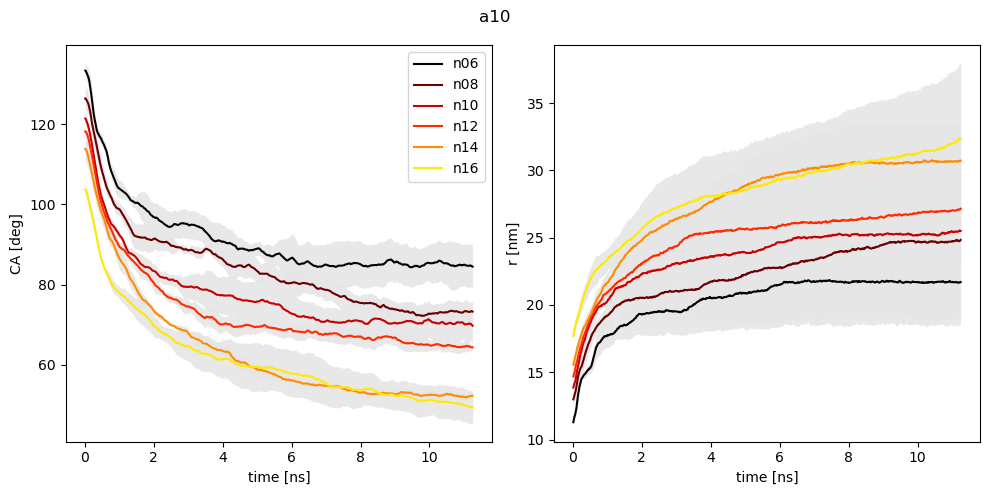

In [12]:
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(1, 2)

for i in range(len(n_range)) :
    
    n_tag = n_range[i]
    
    time_avg = np.zeros(Nt)
    
    angle_fit_avg = np.zeros(Nt)
    angle_fit_avg2 = np.zeros(Nt)
    
    foot_l_vec = []
    foot_r_vec = []
    
    xcl_avg = np.zeros(Nt)
    xcl_avg2 = np.zeros(Nt)
    
    radius_fit_avg = np.zeros(Nt)
    
    # angle_l_avg = np.zeros(Nt)
    # angle_r_avg = np.zeros(Nt)
    # sub_angle_l_avg = np.zeros(Nt)
    # sub_angle_r_avg = np.zeros(Nt)
    
    for r_tag in rep_folders :
        
        time_avg += PS2NS*np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/time.txt')
        
        tmp = np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/angle_fit.txt')
        angle_fit_avg += tmp
        angle_fit_avg2 += tmp*tmp
        
        foot_l_vec.append(np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/foot_l.txt'))
        foot_r_vec.append(np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/foot_r.txt'))
        
        radius_fit_avg += np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/radius_fit.txt')
        
        # angle_l_avg += np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/angle_l.txt')
        # angle_r_avg += np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/angle_r.txt')
        # sub_angle_l_avg += np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/sub_angle_l.txt')
        # sub_angle_r_avg += np.loadtxt(folders_root+'n'+n_tag+'a'+a_fix+'/'+r_tag+'/sub_angle_r.txt')
    
    for k in range(len(rep_folders)) :
        x0 = 0.5*(foot_l_vec[k][0]+foot_r_vec[k][0])
        xcl_avg += x0-foot_l_vec[k]
        xcl_avg += foot_r_vec[k]-x0
        xcl_avg2 += (x0-foot_l_vec[k])*(x0-foot_l_vec[k])
        xcl_avg2 += (foot_r_vec[k]-x0)*(foot_r_vec[k]-x0)
    
    time_avg /= len(rep_folders)
    angle_fit_avg /= len(rep_folders)
    angle_fit_avg2 /= len(rep_folders)
    angle_fit_std = np.sqrt(angle_fit_avg2-angle_fit_avg*angle_fit_avg)
    
    xcl_avg /= (2*len(rep_folders))
    xcl_avg2 /= (2*len(rep_folders))
    xcl_sdt = np.sqrt(xcl_avg2-xcl_avg*xcl_avg)
    radius_fit_avg /= len(rep_folders)
    
    # Save all the data in a suitable format
    save_file = save_folder+"/data_a"+a_fix+"_n"+n_tag+".npz"
    print(save_file)
    np.savez(save_file, t=time_avg, theta=angle_fit_avg, x=xcl_avg, theta_std=angle_fit_std, x_std=xcl_sdt)
    
    # angle_l_avg /= len(rep_folders)
    # angle_r_avg /= len(rep_folders)
    # sub_angle_l_avg /= len(rep_folders)
    # sub_angle_r_avg /= len(rep_folders)
    
    fig.suptitle('a'+a_fix)
    
    ax1.plot(time_avg, angle_fit_avg, c=cm.hot(i/(len(n_range)+1)), label='n'+n_tag)
    ax1.fill_between(time_avg, angle_fit_avg-angle_fit_std, angle_fit_avg+angle_fit_std, 
                     color='0.9',alpha=0.9,linewidth=0.0)
    ax1.set_xlabel('time [ns]')
    ax1.set_ylabel('CA [deg]')
    ax1.legend()
    
    ax2.plot(time_avg, xcl_avg, c=cm.hot(i/(len(n_range)+1)), label='n'+n_tag)
    ax2.fill_between(time_avg, xcl_avg-xcl_sdt, xcl_avg+xcl_sdt, 
                     color='0.9',alpha=0.9,linewidth=0.0)
    ax2.set_xlabel('time [ns]')
    ax2.set_ylabel('r [nm]')
    
    plt.tight_layout()
    plt.savefig("/home/michele/Pictures/FiguresRoughness/ParameterScanningMD/"+'a'+a_fix+".png")

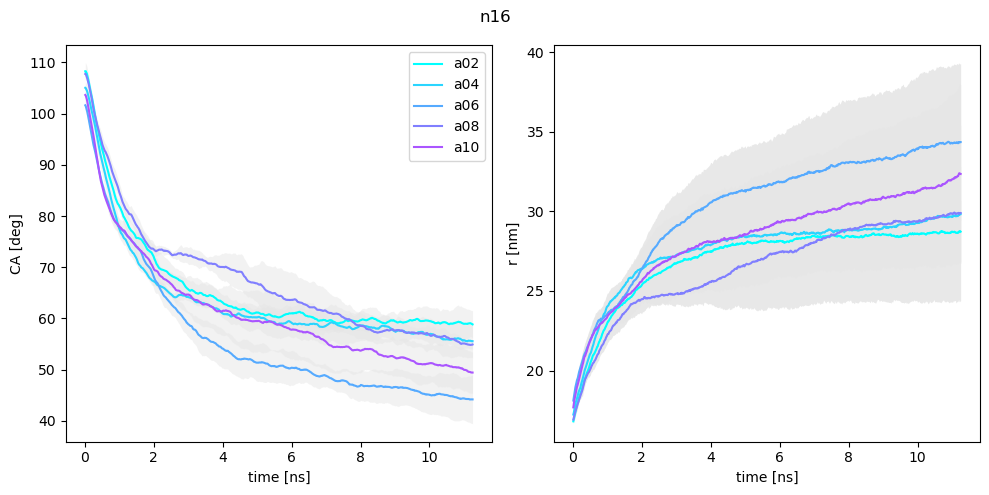

In [10]:
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(1, 2)

for j in range(len(a_range)) :
    
    a_tag = a_range[j]
    
    time_avg = np.zeros(Nt)
    angle_fit_avg = np.zeros(Nt)
    angle_fit_avg2 = np.zeros(Nt)
    
    foot_l_vec = []
    foot_r_vec = []
    
    xcl_avg = np.zeros(Nt)
    xcl_avg2 = np.zeros(Nt)
    
    radius_fit_avg = np.zeros(Nt)
    
    # angle_l_avg = np.zeros(Nt)
    # angle_r_avg = np.zeros(Nt)
    # sub_angle_l_avg = np.zeros(Nt)
    # sub_angle_r_avg = np.zeros(Nt)
    
    for r_tag in rep_folders :
        
        time_avg += PS2NS*np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/time.txt')
        
        tmp = np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/angle_fit.txt')
        angle_fit_avg += tmp
        angle_fit_avg2 += tmp*tmp
        
        foot_l_vec.append(np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/foot_l.txt'))
        foot_r_vec.append(np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/foot_r.txt'))
        
        radius_fit_avg += np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/radius_fit.txt')
        
        # angle_l_avg += np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/angle_l.txt')
        # angle_r_avg += np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/angle_r.txt')
        # sub_angle_l_avg += np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/sub_angle_l.txt')
        # sub_angle_r_avg += np.loadtxt(folders_root+'n'+n_fix+'a'+a_tag+'/'+r_tag+'/sub_angle_r.txt')
    
    for k in range(len(rep_folders)) :
        x0 = 0.5*(foot_l_vec[k][0]+foot_r_vec[k][0])
        xcl_avg += x0-foot_l_vec[k]
        xcl_avg += foot_r_vec[k]-x0
        xcl_avg2 += (x0-foot_l_vec[k])*(x0-foot_l_vec[k])
        xcl_avg2 += (foot_r_vec[k]-x0)*(foot_r_vec[k]-x0)
    
    time_avg /= len(rep_folders)
    angle_fit_avg /= len(rep_folders)
    angle_fit_avg2 /= len(rep_folders)
    angle_fit_std = np.sqrt(angle_fit_avg2-angle_fit_avg*angle_fit_avg)
    
    xcl_avg /= (2*len(rep_folders))
    xcl_avg2 /= (2*len(rep_folders))
    xcl_sdt = np.sqrt(xcl_avg2-xcl_avg*xcl_avg)
    radius_fit_avg /= len(rep_folders)
    
    # angle_l_avg /= len(rep_folders)
    # angle_r_avg /= len(rep_folders)
    # sub_angle_l_avg /= len(rep_folders)
    # sub_angle_r_avg /= len(rep_folders)
    
    fig.suptitle('n'+n_fix)
    
    ax1.plot(time_avg, angle_fit_avg, c=cm.cool(j/(len(n_range))), label='a'+a_tag)
    ax1.fill_between(time_avg, angle_fit_avg-angle_fit_std, angle_fit_avg+angle_fit_std, 
                     color='0.9',alpha=0.5,linewidth=0.0)
    ax1.set_xlabel('time [ns]')
    ax1.set_ylabel('CA [deg]')
    ax1.legend()
    
    ax2.plot(time_avg, xcl_avg, c=cm.cool(j/(len(n_range))), label='a'+a_tag)
    ax2.fill_between(time_avg, xcl_avg-xcl_sdt, xcl_avg+xcl_sdt, 
                     color='0.9',alpha=0.9,linewidth=0.0)
    ax2.set_xlabel('time [ns]')
    ax2.set_ylabel('r [nm]')
    
    plt.tight_layout()
    plt.savefig("/home/michele/Pictures/FiguresRoughness/ParameterScanningMD/"+'n'+n_fix+".png")